In [1]:
# importing essential libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
model.score(X_test, y_test)

0.452606602161738

Text(0, 0.5, 'Predictions')

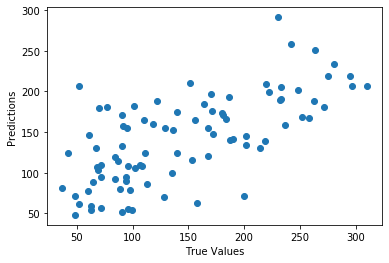

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [9]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


# Feature Scaling

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [11]:
y = data['Value']

In [12]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [13]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

### MinMaxScaler

In [15]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [16]:
X_train1 = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [17]:
X_train1

,Age,Overall,Potential,Jersey Number
0,0.379310,0.500000,0.444444,0.775510
1,0.448276,0.437500,0.377778,0.500000
2,0.275862,0.500000,0.533333,0.938776
3,0.379310,0.479167,0.422222,0.204082
4,0.310345,0.416667,0.511111,0.010204
...,...,...,...,...
14320,0.379310,0.604167,0.600000,0.112245
14321,0.172414,0.583333,0.688889,0.040816
14322,0.172414,0.479167,0.600000,0.142857
14323,0.344828,0.437500,0.422222,0.102041


In [18]:
X_test1 = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [19]:
X_test1

,Age,Overall,Potential,Jersey Number
0,0.241379,0.291667,0.400000,0.193878
1,0.310345,0.145833,0.133333,0.010204
2,0.517241,0.520833,0.466667,0.010204
3,0.344828,0.604167,0.577778,0.030612
4,0.206897,0.541667,0.622222,0.204082
...,...,...,...,...
3577,0.172414,0.312500,0.511111,0.367347
3578,0.241379,0.229167,0.266667,0.265306
3579,0.379310,0.395833,0.400000,0.153061
3580,0.620690,0.354167,0.288889,0.112245


#### Implement your own MinMaxScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [20]:
class MyMinMaxScaler:
    
    def __init__(self):
        super(MyMinMaxScaler, self).__init__()        

    def fit(self, X):
        self.X=X
        columns=self.X.columns
        max_=[]
        min_=[]
        diff=[]
        for i in columns:
            max_.append(X[i].max())
            min_.append(X[i].min())
        for j in range(len(max_)):
            diff.append(max_[j]-min_[j])
        
        self.min_=min_
        self.diff=diff
        
        return self
        
    def transform(self, X):

        self.X=X
        X_transformed=(X.sub(self.min_, axis='columns')).div(self.diff, axis='columns')
        
        return X_transformed

In [21]:
# TODO
norm1 = MyMinMaxScaler().fit(X_train)
X_train2 = pd.DataFrame(columns = X_train.columns, data = norm1.transform(X_train))
X_train2

,Age,Overall,Potential,Jersey Number
4941,0.379310,0.500000,0.444444,0.775510
8266,0.448276,0.437500,0.377778,0.500000
5345,0.275862,0.500000,0.533333,0.938776
6126,0.379310,0.479167,0.422222,0.204082
9088,0.310345,0.416667,0.511111,0.010204
...,...,...,...,...
1728,0.379310,0.604167,0.600000,0.112245
2551,0.172414,0.583333,0.688889,0.040816
5868,0.172414,0.479167,0.600000,0.142857
8534,0.344828,0.437500,0.422222,0.102041


In [22]:
X_test2 = pd.DataFrame(columns = X_test.columns, data = norm1.transform(X_test))
X_test2

,Age,Overall,Potential,Jersey Number
14394,0.241379,0.291667,0.400000,0.193878
17341,0.310345,0.145833,0.133333,0.010204
4058,0.517241,0.520833,0.466667,0.010204
1597,0.344828,0.604167,0.577778,0.030612
3215,0.206897,0.541667,0.622222,0.204082
...,...,...,...,...
13717,0.172414,0.312500,0.511111,0.367347
16387,0.241379,0.229167,0.266667,0.265306
9854,0.379310,0.395833,0.400000,0.153061
11924,0.620690,0.354167,0.288889,0.112245


### Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [25]:
X_train1_  = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [31]:
X_train1_

,Age,Overall,Potential,Jersey Number
0,0.403851,0.539003,-0.222617,3.593251
1,0.831179,0.105560,-0.713078,1.902857
2,-0.237141,0.539003,0.431332,4.594966
3,0.403851,0.394522,-0.386104,0.087248
4,-0.023477,-0.038922,0.267845,-1.102289
...,...,...,...,...
14320,0.403851,1.261409,0.921794,-0.476217
14321,-0.878133,1.116928,1.575743,-0.914467
14322,-0.878133,0.394522,0.921794,-0.288395
14323,0.190187,0.105560,-0.386104,-0.538824


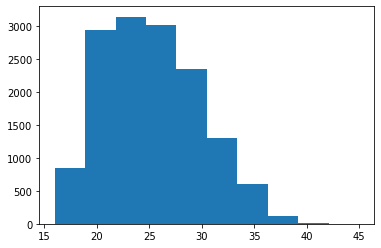

In [26]:
plt.hist(X_train.Age)
plt.show()

In [27]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-0.450805,-0.905809,-0.549591,0.024641
1,-0.023477,-1.917177,-2.511438,-1.102289
2,1.258507,0.683484,-0.059129,-1.102289
3,0.190187,1.261409,0.758307,-0.977074
4,-0.664469,0.827966,1.085281,0.087248
...,...,...,...,...
3577,-0.878133,-0.761328,0.267845,1.088963
3578,-0.450805,-1.339253,-1.530515,0.462891
3579,0.403851,-0.183403,-0.549591,-0.225788
3580,1.899498,-0.472365,-1.367027,-0.476217


#### Implement your own StandardScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [28]:
class MyStandardScaler:
    
    def __init__(self):
        super(MyStandardScaler, self).__init__()

    def fit(self, X):
        self.X=X
        columns=self.X.columns
        mean=[]
        sd=[]        
        for i in columns:
            mean.append(X[i].mean())
            sd.append(X[i].std())
        self.mean=mean
        self.sd=sd
        return self        
    def transform(self, X):
        self.X=X
        X_transformed=(X.sub(self.mean, axis='columns')).div(self.sd, axis='columns')
        return X_transformed

In [30]:
norm2 = MyStandardScaler().fit(X_train)
X_train_  = pd.DataFrame(columns = X_train.columns, data = norm2.transform(X_train))
X_train_

,Age,Overall,Potential,Jersey Number
4941,0.403837,0.538984,-0.222609,3.593125
8266,0.831150,0.105556,-0.713053,1.902790
5345,-0.237133,0.538984,0.431317,4.594806
6126,0.403837,0.394508,-0.386090,0.087245
9088,-0.023476,-0.038920,0.267836,-1.102250
...,...,...,...,...
1728,0.403837,1.261365,0.921762,-0.476200
2551,-0.878102,1.116889,1.575688,-0.914435
5868,-0.878102,0.394508,0.921762,-0.288385
8534,0.190180,0.105556,-0.386090,-0.538805


In [32]:
X_test_  = pd.DataFrame(columns = X_train.columns, data = norm2.transform(X_test))
X_test_

,Age,Overall,Potential,Jersey Number
14394,-0.450789,-0.905777,-0.549572,0.024640
17341,-0.023476,-1.917111,-2.511350,-1.102250
4058,1.258463,0.683461,-0.059127,-1.102250
1597,0.190180,1.261365,0.758280,-0.977040
3215,-0.664445,0.827937,1.085244,0.087245
...,...,...,...,...
13717,-0.878102,-0.761301,0.267836,1.088925
16387,-0.450789,-1.339206,-1.530461,0.462875
9854,0.403837,-0.183396,-0.549572,-0.225780
11924,1.899432,-0.472349,-1.366980,-0.476200


# tasks

###### try applying this scalers to any dataset and check the regression results

In [33]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [35]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [36]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.816667,1.0,0.405172,0.690141,0.544503,0.524900,0.220779,0.423131,0.590940,0.500000
1,0.450000,1.0,0.284483,0.323944,0.335079,0.406375,0.103896,0.564175,0.486602,0.575758
2,0.516667,0.0,0.556034,0.859155,0.356021,0.315737,0.337662,0.282087,0.551161,0.454545
3,0.366667,0.0,0.215517,0.338028,0.198953,0.181275,0.467532,0.141044,0.293531,0.030303
4,0.383333,0.0,0.094828,0.126761,0.267016,0.197211,0.571429,0.000000,0.342589,0.348485
...,...,...,...,...,...,...,...,...,...,...
348,0.050000,0.0,0.051724,0.281690,0.240838,0.256972,0.389610,0.141044,0.256548,0.196970
349,0.516667,1.0,0.478448,0.802817,0.272251,0.217131,0.415584,0.141044,0.518828,0.560606
350,0.633333,0.0,0.275862,0.436620,0.397906,0.273904,0.636364,0.141044,0.443568,0.500000
351,0.433333,0.0,0.262931,0.295775,0.350785,0.382470,0.298701,0.282087,0.337464,0.363636


In [37]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [38]:
model.score(X_test, y_test)

0.45260660216173787

In [39]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [41]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [42]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,1.498365,1.061370,0.219902,1.138877,0.728473,1.055893,-0.824451,0.711038,0.547560,-0.061449
1,-0.228858,1.061370,-0.419366,-0.710597,-0.424929,0.272425,-1.529791,1.484286,-0.019776,0.367236
2,0.085182,-0.942179,1.018987,1.992480,-0.309589,-0.326699,-0.119111,-0.062210,0.331260,-0.318660
3,-0.621409,-0.942179,-0.784662,-0.639464,-1.174640,-1.215508,0.664600,-0.835458,-1.069599,-2.719299
4,-0.542899,-0.942179,-1.423930,-1.706468,-0.799784,-1.110167,1.291569,-1.608706,-0.802848,-0.918820
...,...,...,...,...,...,...,...,...,...,...
348,-2.113102,-0.942179,-1.652240,-0.923998,-0.943960,-0.715141,0.194374,-0.835458,-1.270691,-1.776191
349,0.085182,1.061370,0.608029,1.707946,-0.770949,-0.978492,0.351116,-0.835458,0.155448,0.281499
350,0.634754,-0.942179,-0.465028,-0.141528,-0.078908,-0.603217,1.683425,-0.835458,-0.253776,-0.061449
351,-0.307368,-0.942179,-0.533521,-0.852865,-0.338424,0.114414,-0.354224,-0.062210,-0.830712,-0.833083


In [43]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [44]:
model.score(X_test, y_test)

0.45260660216173787

In [45]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


In [46]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [47]:
model.score(X_test, y_test)

-231.9688222115084

In [48]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 1110.992426954278
Train RMSE: 53.55881425327268


In [49]:
data = pd.read_csv('regression.csv') 
y = data.Value
data = data.drop(['Name', 'Nationality', 'Club', 
                  'Wage', 'Position', 'Contract Valid Until', 
                  'Height', 'Weight', 'Value'], axis = 1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [51]:
norm = StandardScaler().fit(X_train)

In [52]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [53]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [54]:
model.score(X_test, y_test)

0.4499045750576578

In [55]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 4332536.175036151
Train RMSE: 4108467.718850979
